In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Datos_limpios_Amsterdam.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   9659 non-null   int64  
 1   last_scraped                 9659 non-null   object 
 2   name                         9659 non-null   object 
 3   description                  9659 non-null   object 
 4   neighborhood_overview        9659 non-null   object 
 5   host_location                9659 non-null   object 
 6   host_response_time           9659 non-null   object 
 7   host_response_rate           9659 non-null   object 
 8   host_acceptance_rate         9659 non-null   object 
 9   host_is_superhost            9659 non-null   object 
 10  host_verifications           9659 non-null   object 
 11  host_has_profile_pic         9659 non-null   object 
 12  host_identity_verified       9659 non-null   object 
 13  neighbourhood     

In [4]:
dff=df
dff['room_type'] = dff['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


In [5]:
df1 = dff[dff["room_type"] ==4]

In [6]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y= df1['price']
X1= df1['room_type'].to_frame()

In [7]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [8]:
type(model)

sklearn.linear_model._base.LinearRegression

In [9]:
#Codigo para convertir un str en float
import re
Y= Y.apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [10]:
model.fit(X=X1, y=Y)

LinearRegression()

In [11]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(182.24137931034483)}

In [12]:
#Limpiar valores
import re
df1['price']= df1['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [13]:
#Predicciones
y_pred= model.predict(X=X1)
y_pred

array([182.24137931, 182.24137931, 182.24137931, 182.24137931,
       182.24137931, 182.24137931, 182.24137931, 182.24137931,
       182.24137931, 182.24137931, 182.24137931, 182.24137931,
       182.24137931, 182.24137931, 182.24137931, 182.24137931,
       182.24137931, 182.24137931, 182.24137931, 182.24137931,
       182.24137931, 182.24137931, 182.24137931, 182.24137931,
       182.24137931, 182.24137931, 182.24137931, 182.24137931,
       182.24137931])

<Axes: xlabel='room_type', ylabel='price'>

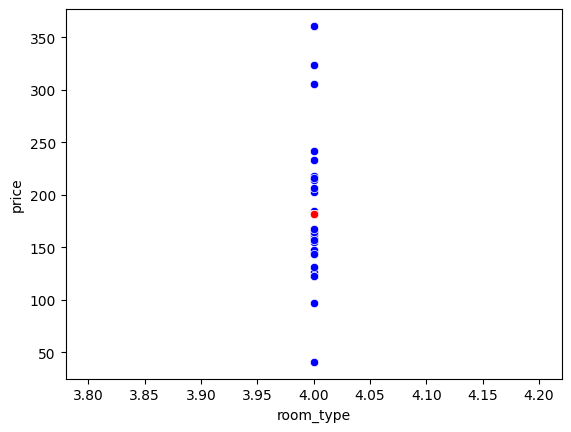

In [14]:
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y=y_pred, color="red", data=df1)

In [15]:
coef_Deter= model.score(X=X1, y=Y)
coef_Deter

0.0

In [16]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [17]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
Y2= df1['price']
X2= df1['host_acceptance_rate'].to_frame()

In [18]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [19]:
X2 = X2.replace({'%': ''}, regex=True).astype(float)

In [20]:
model2.fit(X=X2, y=Y2)

LinearRegression()

In [21]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.33950617]),
 'rank_': 1,
 'singular_': array([3.34251609]),
 'intercept_': np.float64(-50.66049382716085)}

In [22]:
#Limpiar valores
import re
df1['host_acceptance_rate']= df1['host_acceptance_rate'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [23]:
#Predicciones
y_pred2= model2.predict(X=X2)
y_pred2

array([183.29012346, 183.29012346, 180.95061728, 183.29012346,
       183.29012346, 183.29012346, 180.95061728, 178.61111111,
       180.95061728, 183.29012346, 183.29012346, 180.95061728,
       183.29012346, 183.29012346, 183.29012346, 183.29012346,
       183.29012346, 183.29012346, 183.29012346, 180.95061728,
       183.29012346, 178.61111111, 183.29012346, 180.95061728,
       180.95061728, 183.29012346, 180.95061728, 180.95061728,
       183.29012346])

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

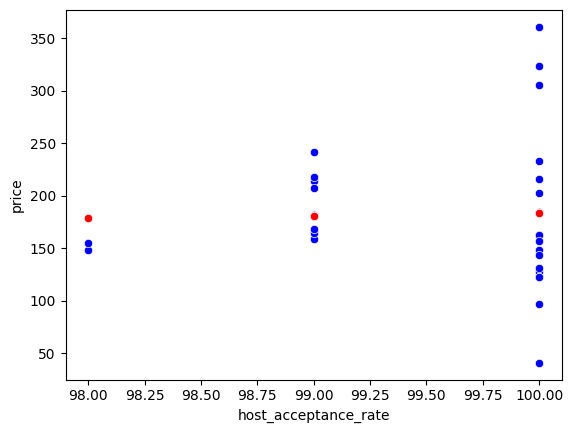

In [24]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y=y_pred2, color="red", data=df1)

In [25]:
coef_Deter2= model2.score(X=X2, y=Y2)
coef_Deter2

0.0004897029656497631

In [26]:
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.022129233282013255)

In [27]:
df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_20676\4038004741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})


In [28]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_is_superhost'] != 'Without information']
Y3= df1['price']
X3= df1['host_is_superhost'].to_frame()

In [29]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
type(model3)

sklearn.linear_model._base.LinearRegression

In [30]:
model3.fit(X=X3, y=Y3)

LinearRegression()

In [31]:
#Predicciones
y_pred3= model3.predict(X=X3)
y_pred3

array([185.16666667, 181.47826087, 181.47826087, 181.47826087,
       185.16666667, 181.47826087, 181.47826087, 181.47826087,
       181.47826087, 181.47826087, 181.47826087, 181.47826087,
       181.47826087, 185.16666667, 181.47826087, 185.16666667,
       181.47826087, 185.16666667, 181.47826087, 181.47826087,
       181.47826087, 181.47826087, 181.47826087, 185.16666667,
       181.47826087, 181.47826087, 181.47826087, 181.47826087,
       181.47826087])

<Axes: xlabel='host_is_superhost', ylabel='price'>

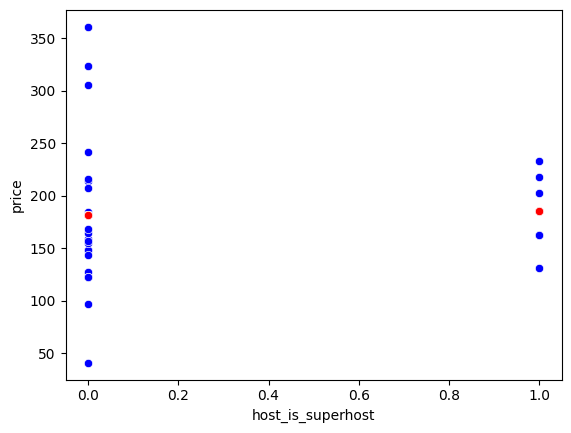

In [32]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y=y_pred3, color="red", data=df1)

In [33]:
coef_Deter3= model3.score(X=X3, y=Y3)
coef_Deter3

0.0005184367880876062

In [34]:
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.022769207014905157)

In [35]:
df1['bathrooms'] = df1['bathrooms'].round().astype(int)

In [36]:
#df1 = df1[df1['accommodates'] != 'Does not say']
#df1 = df1[df1['bathrooms'] != 'Without information']
Y4= df1['accommodates']
X4= df1['bathrooms'].to_frame()

In [37]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()
type(model4)

sklearn.linear_model._base.LinearRegression

In [38]:
model4.fit(X=X4, y=Y4)

LinearRegression()

In [39]:
#Predicciones
y_pred4= model4.predict(X=X4)
y_pred4

array([2.13793103, 2.13793103, 2.13793103, 2.13793103, 2.13793103,
       2.13793103, 2.13793103, 2.13793103, 2.13793103, 2.13793103,
       2.13793103, 2.13793103, 2.13793103, 2.13793103, 2.13793103,
       2.13793103, 2.13793103, 2.13793103, 2.13793103, 2.13793103,
       2.13793103, 2.13793103, 2.13793103, 2.13793103, 2.13793103,
       2.13793103, 2.13793103, 2.13793103, 2.13793103])

<Axes: xlabel='bathrooms', ylabel='accommodates'>

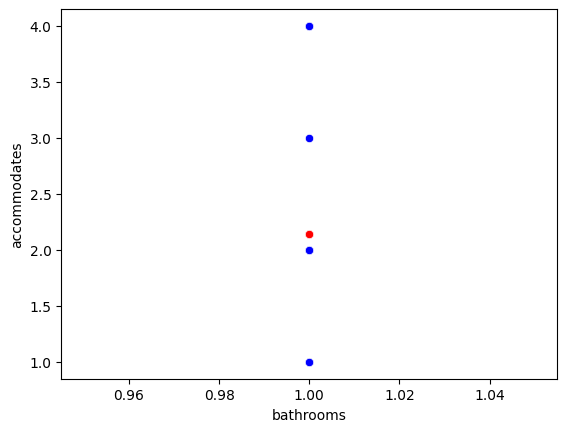

In [40]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y=y_pred4, color="red", data=df1)

In [41]:
coef_Deter4= model4.score(X=X4, y=Y4)
coef_Deter4

0.0

In [42]:
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.0)

In [43]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y5= df1['price']
X5= df1['review_scores_cleanliness'].to_frame()

In [44]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()
type(model5)

sklearn.linear_model._base.LinearRegression

In [45]:
model5.fit(X=X5, y=Y5)

LinearRegression()

In [46]:
#Limpiar valores
import re
df1['review_scores_cleanliness']= df1['review_scores_cleanliness'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [47]:
#Predicciones
y_pred5= model5.predict(X=X5)
y_pred5

array([206.35560291, 165.04600468, 146.35832929, 176.84874703,
       199.47066987, 139.47339625, 189.63505124, 185.70080379,
       190.61861311, 208.32272663, 165.04600468, 161.11175723,
       186.68436565, 189.63505124, 181.76655634, 201.43779359,
       159.1446335 , 200.45423173, 159.1446335 , 189.63505124,
       165.04600468, 179.79943262, 208.32272663, 189.63505124,
       208.32272663, 184.71724193, 196.51998428, 198.48710801,
       152.25970047])

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

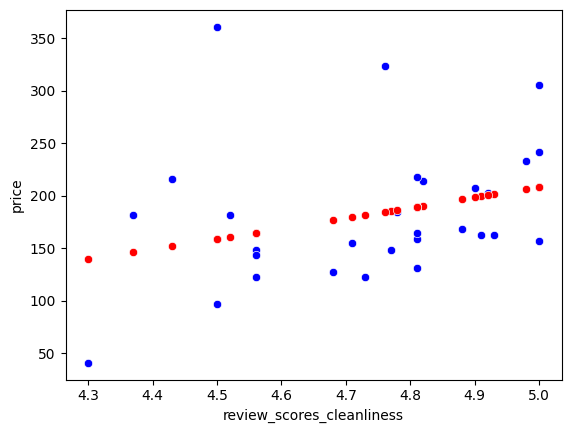

In [48]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y=y_pred5, color="red", data=df1)

In [49]:
coef_Deter5= model5.score(X=X5, y=Y5)
coef_Deter5

0.08700985670985095

In [50]:
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.29497433228986375)

In [51]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_20676\3355181784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})


In [52]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_identity_verified'] != 'Nothing']
Y6= df1['price']
X6= df1['host_identity_verified'].to_frame()

In [53]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()
type(model6)

sklearn.linear_model._base.LinearRegression

In [54]:
model6.fit(X=X6, y=Y6)

LinearRegression()

In [55]:
#Predicciones
y_pred6= model6.predict(X=X6)
y_pred6

array([187.08695652, 187.08695652, 187.08695652, 187.08695652,
       187.08695652, 163.66666667, 163.66666667, 187.08695652,
       187.08695652, 187.08695652, 187.08695652, 187.08695652,
       187.08695652, 187.08695652, 187.08695652, 187.08695652,
       187.08695652, 187.08695652, 187.08695652, 163.66666667,
       187.08695652, 187.08695652, 187.08695652, 187.08695652,
       163.66666667, 187.08695652, 163.66666667, 163.66666667,
       187.08695652])

<Axes: xlabel='host_identity_verified', ylabel='price'>

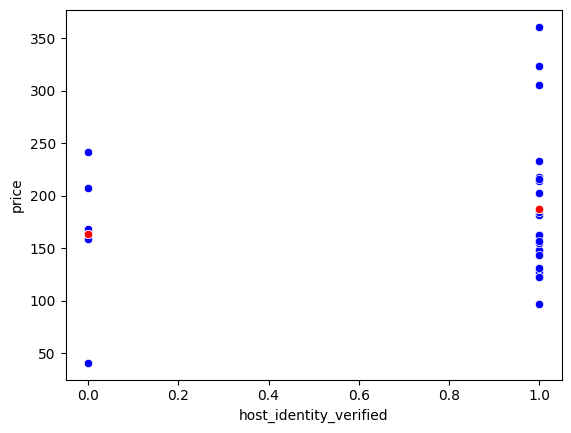

In [56]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1)
sns.scatterplot(x='host_identity_verified', y=y_pred6, color="red", data=df1)

In [57]:
coef_Deter6= model6.score(X=X6, y=Y6)
coef_Deter6

0.02090272711425789

In [58]:
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.1445777545622351)

In [59]:
df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_20676\1876949163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})


In [60]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['instant_bookable'] != 'Nothing']
Y7= df1['price']
X7= df1['instant_bookable'].to_frame()

In [61]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()
type(model7)

sklearn.linear_model._base.LinearRegression

In [62]:
model7.fit(X=X7, y=Y7)

LinearRegression()

In [63]:
#Predicciones
y_pred7= model7.predict(X=X7)
y_pred7

array([176.83333333, 176.83333333, 176.83333333, 176.83333333,
       176.83333333, 176.83333333, 176.83333333, 208.2       ,
       208.2       , 208.2       , 176.83333333, 176.83333333,
       176.83333333, 176.83333333, 176.83333333, 176.83333333,
       176.83333333, 176.83333333, 176.83333333, 176.83333333,
       176.83333333, 208.2       , 176.83333333, 208.2       ,
       176.83333333, 176.83333333, 176.83333333, 176.83333333,
       176.83333333])

<Axes: xlabel='instant_bookable', ylabel='price'>

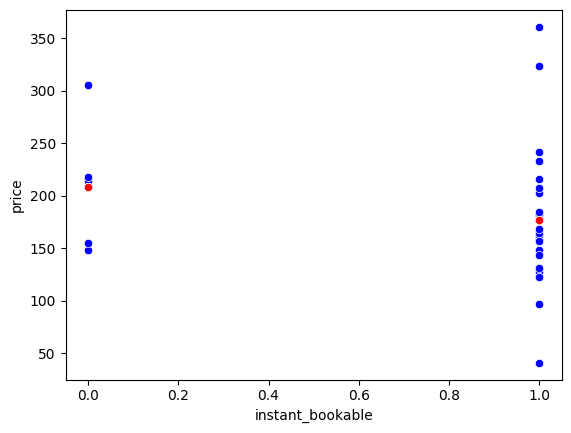

In [64]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y=y_pred7, color="red", data=df1)

In [65]:
coef_Deter7= model7.score(X=X7, y=Y7)
coef_Deter7

0.03260298142344986

In [66]:
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.18056295695255398)

In [67]:
df1['property_type'] = df1['property_type'].replace({
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Entire home': 3,
    'Entire loft': 4,
    'Houseboat': 5,
    'Entire townhouse': 6,
    'Entire serviced apartment': 7,
    'Boat': 8,
    'Entire guest suite': 9,
    'Entire guesthouse': 10,
    'Entire place': 11,
    'Entire villa': 12,
    'Room in aparthotel': 13,
    'Entire vacation home': 14,
    'Tiny home': 15,
    'Entire cabin': 16,
    'Casa particular': 17,
    'Entire cottage': 18,
    'Camper/RV': 19,
    'Barn': 20,
    'Entire chalet': 21,
    'Room in bed and breakfast':22,
    'Room in boutique hotel':23,
    'Room in hostel':24,
    'Room in serviced apartment':25,
    'Room in hotel':26,
})

C:\Users\lapep\AppData\Local\Temp\ipykernel_20676\1807053926.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['property_type'] = df1['property_type'].replace({


In [68]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['property_type'] != 'Nothing']
Y8= df1['price']
X8= df1['property_type'].to_frame()

In [69]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()
type(model8)

sklearn.linear_model._base.LinearRegression

In [70]:
model8.fit(X=X8, y=Y8)

LinearRegression()

In [71]:
#Predicciones
y_pred8= model8.predict(X=X8)
y_pred8

array([188.01221264, 182.24137931, 176.47054598, 188.01221264,
       188.01221264, 176.47054598, 170.69971264, 188.01221264,
       188.01221264, 188.01221264, 188.01221264, 176.47054598,
       182.24137931, 164.92887931, 188.01221264, 188.01221264,
       182.24137931, 188.01221264, 188.01221264, 170.69971264,
       188.01221264, 188.01221264, 182.24137931, 188.01221264,
       170.69971264, 188.01221264, 170.69971264, 170.69971264,
       188.01221264])

<Axes: xlabel='property_type', ylabel='price'>

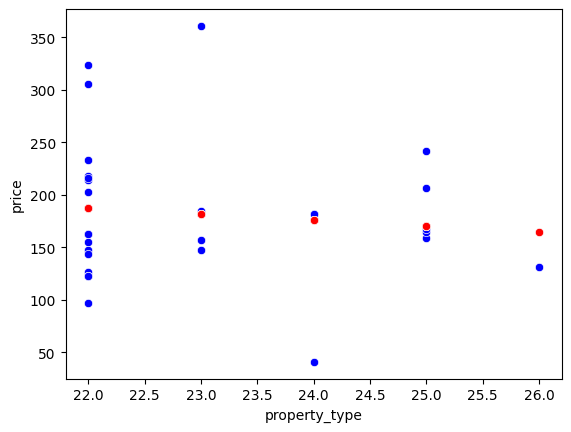

In [72]:
sns.scatterplot(x='property_type', y='price', color="blue", data=df1)
sns.scatterplot(x='property_type', y=y_pred8, color="red", data=df1)

In [73]:
coef_Deter8= model8.score(X=X8, y=Y8)
coef_Deter8

0.012801345872955783

In [74]:
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.11314303280783922)

In [75]:
#Declaramos las variables dependientes e independientes para la regresión lineal 
Vars_Indep = df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
    'host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']]
Var_Dep = df1[['price']]

In [76]:
#Declaramos las variables dependientes e independientes para la regresión lineal accommodates vs bathrooms
Vars_Indep2= df1 [['bathrooms']]
Var_Dep2 = df1[['accommodates']]

In [77]:
from sklearn.linear_model import LinearRegression
model9 = LinearRegression()
model10= LinearRegression()
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [78]:
model9.fit(X=Vars_Indep, y=Var_Dep)
model10.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [79]:
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
        'host_identity_verified', 'host_is_superhost', 'instant_bookable',
        'property_type'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([[  0.        , 130.93561733,  16.56544134,  40.98637708,
         -36.17971836, -29.71742332,   6.32589604]]),
 'rank_': 6,
 'singular_': array([7.22417246, 3.57390615, 2.20820745, 1.42796534, 1.19078311,
        0.80994316, 0.        ]),
 'intercept_': array([-2232.7572977])}

In [80]:
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.]]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': array([2.13793103])}

In [81]:
y_pred= model9.predict(X=df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
y_pred

array([[190.10515915],
       [177.61781426],
       [142.50050167],
       [187.00419231],
       [180.93966594],
       [108.91407271],
       [165.45169224],
       [195.3749385 ],
       [218.48716071],
       [258.62101317],
       [171.29191823],
       [162.14084426],
       [206.42365008],
       [193.14968835],
       [193.55097317],
       [183.55837828],
       [169.76167722],
       [182.24902211],
       [163.43578119],
       [165.45169224],
       [171.29191823],
       [187.51880146],
       [235.22948589],
       [180.99808618],
       [190.32945954],
       [197.47904169],
       [174.61718546],
       [177.2358978 ],
       [154.27028798]])

In [82]:
# Lista de columnas a conservar
columnas_a_conservar = [
    "price", "room_type", "review_scores_cleanliness", "host_acceptance_rate",
    "host_identity_verified", "host_is_superhost", "instant_bookable",
    "accommodates", "bathrooms", "property_type"
]

# Filtrar el DataFrame para conservar solo esas columnas
df1= df1[columnas_a_conservar]

In [83]:
#insertamos la columna de predicciones en el DataFrame 
df1.insert(0, 'Predicciones', y_pred)
df1

,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
670,190.105159,233.0,4,4.98,100.0,1,1,1,3.0,1,22
764,177.617814,148.0,4,4.56,100.0,1,0,1,1.0,1,23
1158,142.500502,182.0,4,4.37,99.0,1,0,1,2.0,1,24
1175,187.004192,127.0,4,4.68,100.0,1,0,1,2.0,1,22
1524,180.939666,163.0,4,4.91,100.0,1,1,1,2.0,1,22
1552,108.914073,41.0,4,4.30,100.0,0,0,1,1.0,1,24
1672,165.451692,159.0,4,4.81,99.0,0,0,1,2.0,1,25
2445,195.374938,148.0,4,4.77,98.0,1,0,0,2.0,1,22
4108,218.487161,214.0,4,4.82,99.0,1,0,0,4.0,1,22
4429,258.621013,306.0,4,5.00,100.0,1,0,0,2.0,1,22


In [84]:
y_pred2= model10.predict(X=df1[['bathrooms']])
y_pred2

array([[2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103],
       [2.13793103]])

In [85]:
df1.insert(1, 'Predicciones2', y_pred2)
df1

,Predicciones,Predicciones2,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
670,190.105159,2.137931,233.0,4,4.98,100.0,1,1,1,3.0,1,22
764,177.617814,2.137931,148.0,4,4.56,100.0,1,0,1,1.0,1,23
1158,142.500502,2.137931,182.0,4,4.37,99.0,1,0,1,2.0,1,24
1175,187.004192,2.137931,127.0,4,4.68,100.0,1,0,1,2.0,1,22
1524,180.939666,2.137931,163.0,4,4.91,100.0,1,1,1,2.0,1,22
1552,108.914073,2.137931,41.0,4,4.30,100.0,0,0,1,1.0,1,24
1672,165.451692,2.137931,159.0,4,4.81,99.0,0,0,1,2.0,1,25
2445,195.374938,2.137931,148.0,4,4.77,98.0,1,0,0,2.0,1,22
4108,218.487161,2.137931,214.0,4,4.82,99.0,1,0,0,4.0,1,22
4429,258.621013,2.137931,306.0,4,5.00,100.0,1,0,0,2.0,1,22


In [86]:
coef_Deter9= model9.score(X=Vars_Indep, y=Var_Dep)
coef_Deter9

0.1676496812556334

In [87]:
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.40945046251730305)

In [88]:
coef_Deter10= model10.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter10

0.0

In [89]:
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.0)

In [90]:
df1['predicted_price'] = model9.predict(df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
df1['predicted_accommodates'] = model10.predict(df1[['bathrooms']])

In [91]:
df1= df1.drop(['room_type'], axis=1)

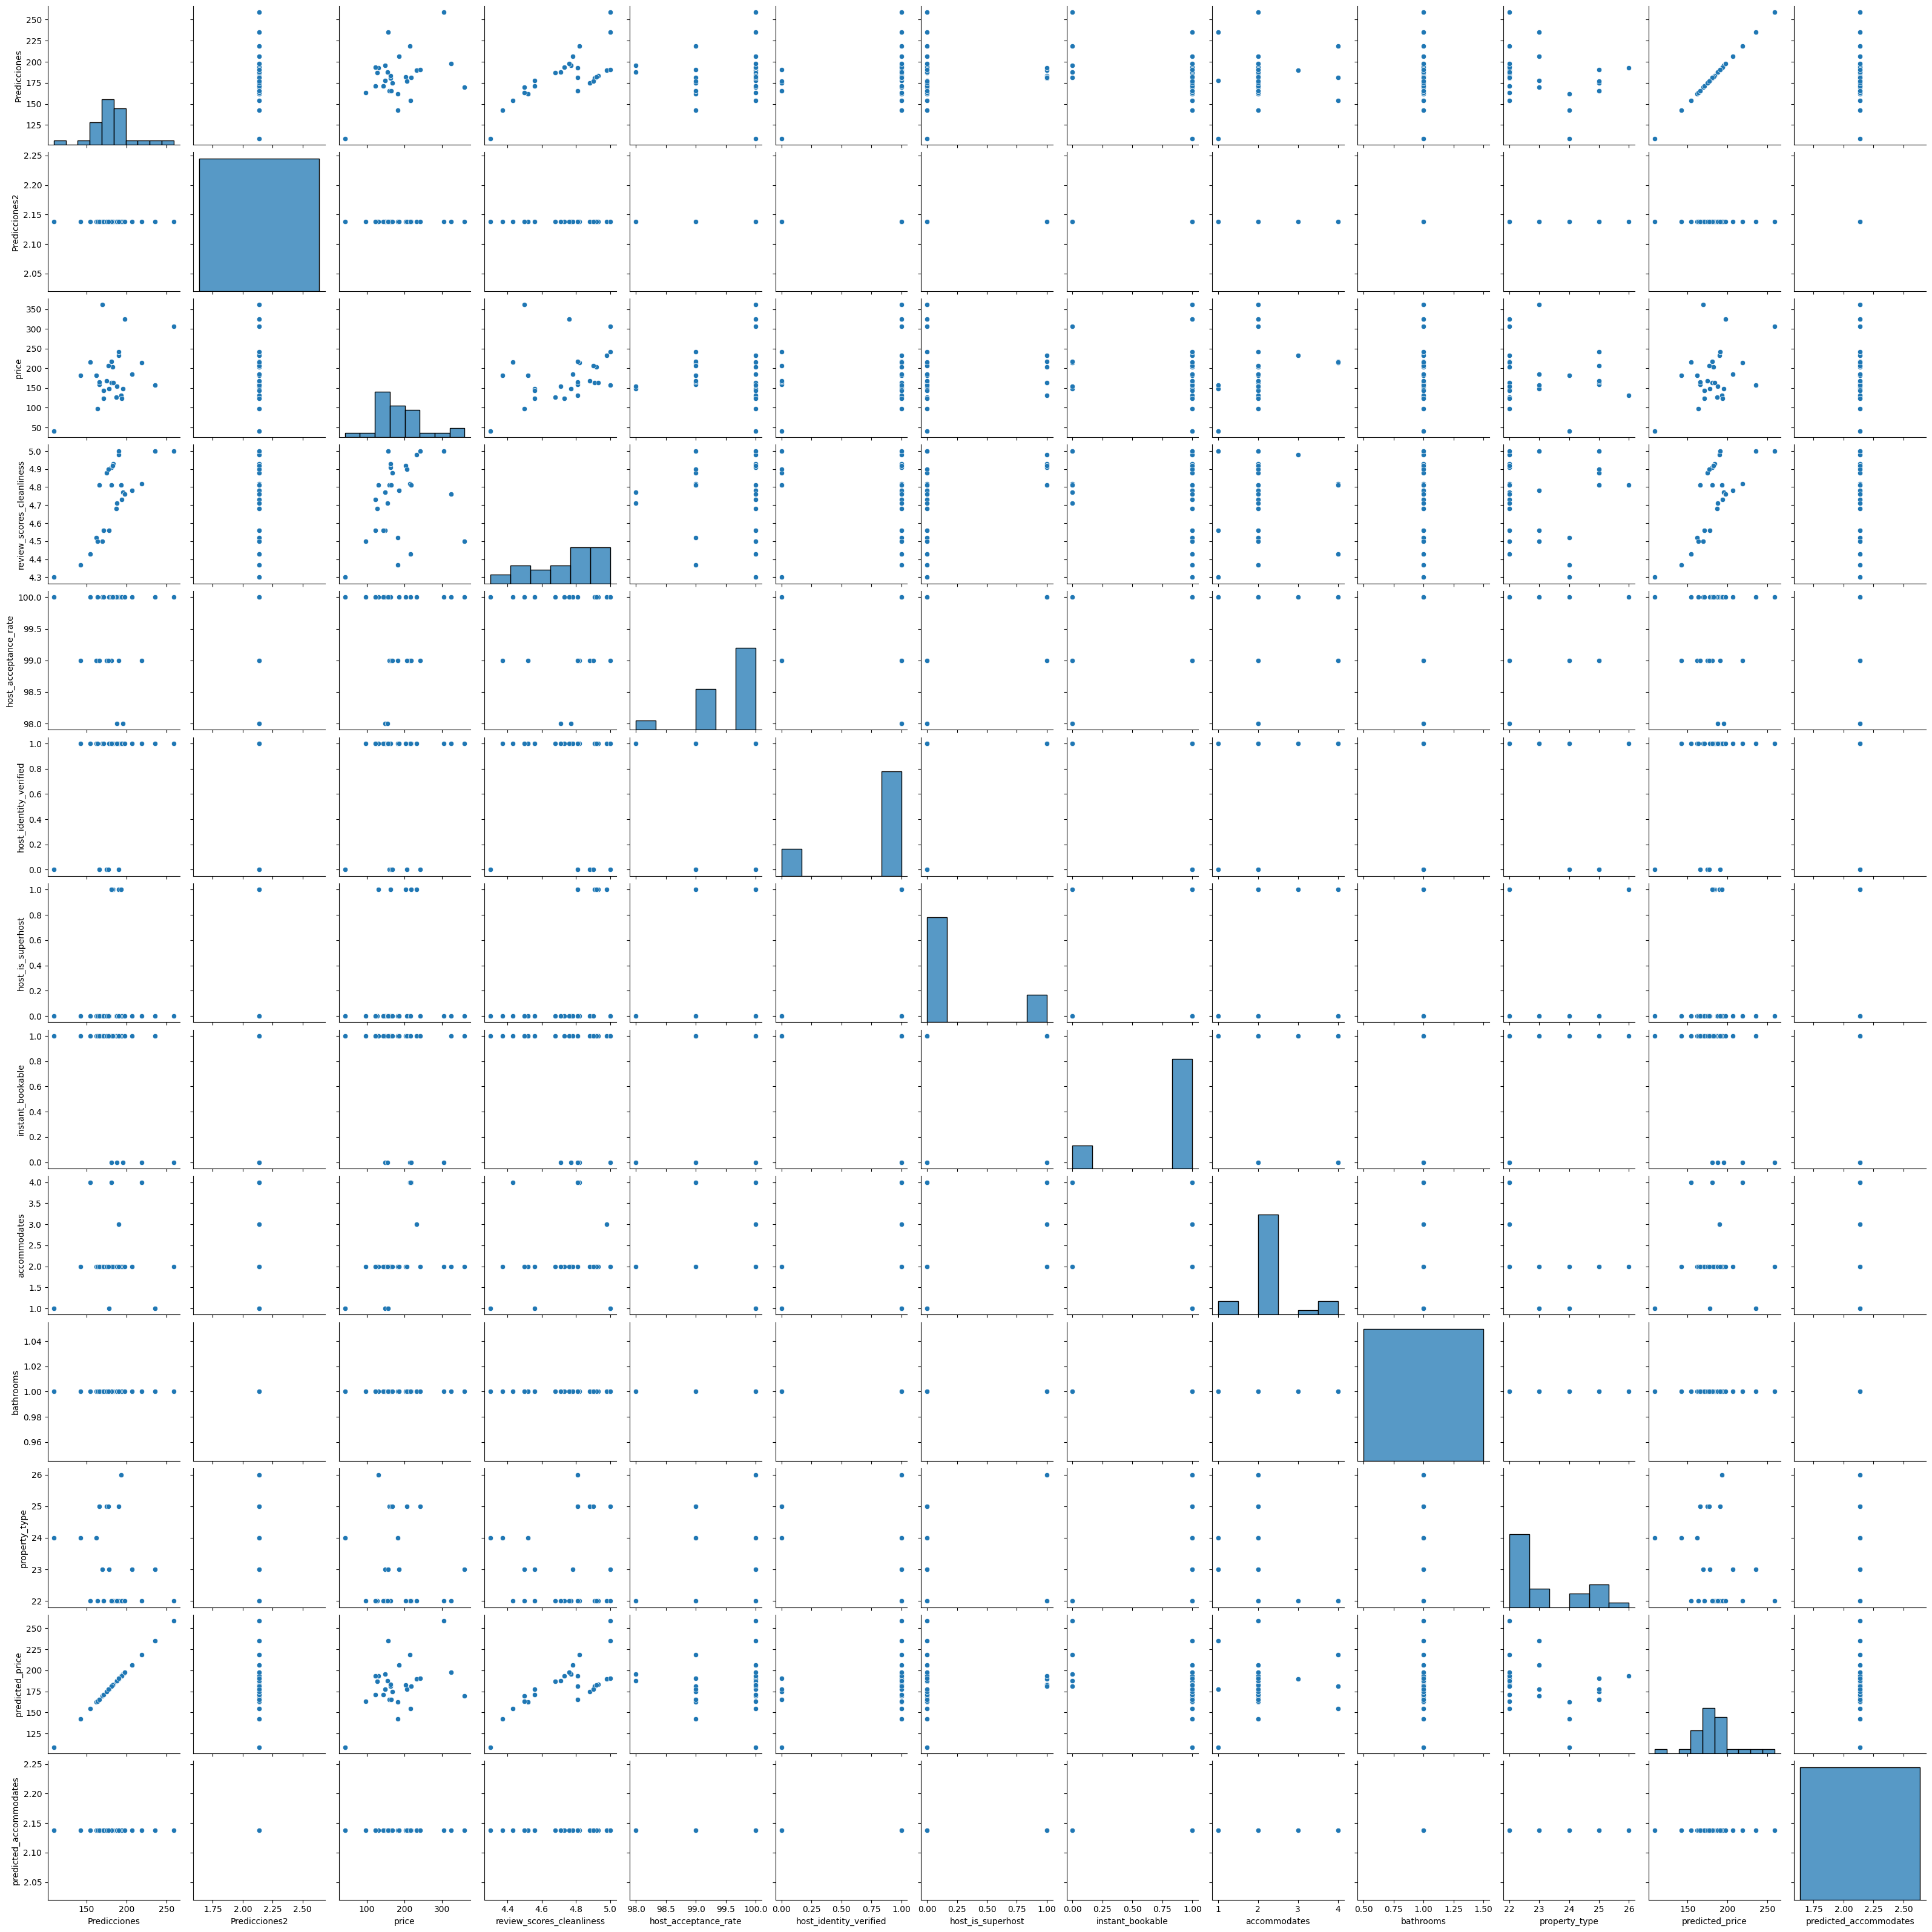

In [92]:
sns.pairplot(df1)

In [93]:
Corr_Factors9= df1.corr()
Corr_Factors9

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.409450,0.720415,0.054046,0.353102,0.055609,-0.440989,0.082452,NaN,-0.276329,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.409450,NaN,1.000000,0.294974,0.022129,0.144578,0.022769,-0.180563,0.326902,NaN,-0.113143,0.409450,NaN
review_scores_cleanliness,0.720415,NaN,0.294974,1.000000,-0.092381,-0.125890,0.411379,-0.202183,0.072188,NaN,0.047669,0.720415,NaN
host_acceptance_rate,0.054046,NaN,0.022129,-0.092381,1.000000,0.316857,0.231731,0.552794,-0.167984,NaN,-0.259094,0.054046,NaN
host_identity_verified,0.353102,NaN,0.144578,-0.125890,0.316857,1.000000,0.260870,-0.233126,0.213156,NaN,-0.727833,0.353102,NaN
host_is_superhost,0.055609,NaN,0.022769,0.411379,0.231731,0.260870,1.000000,0.007771,0.253374,NaN,-0.132333,0.055609,NaN
instant_bookable,-0.440989,NaN,-0.180563,-0.202183,0.552794,-0.233126,0.007771,1.000000,-0.414039,NaN,0.354779,-0.440989,NaN
accommodates,0.082452,NaN,0.326902,0.072188,-0.167984,0.213156,0.253374,-0.414039,1.000000,NaN,-0.293785,0.082452,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
Corr_Factors10= abs(Corr_Factors9)
Corr_Factors10

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.409450,0.720415,0.054046,0.353102,0.055609,0.440989,0.082452,NaN,0.276329,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.409450,NaN,1.000000,0.294974,0.022129,0.144578,0.022769,0.180563,0.326902,NaN,0.113143,0.409450,NaN
review_scores_cleanliness,0.720415,NaN,0.294974,1.000000,0.092381,0.125890,0.411379,0.202183,0.072188,NaN,0.047669,0.720415,NaN
host_acceptance_rate,0.054046,NaN,0.022129,0.092381,1.000000,0.316857,0.231731,0.552794,0.167984,NaN,0.259094,0.054046,NaN
host_identity_verified,0.353102,NaN,0.144578,0.125890,0.316857,1.000000,0.260870,0.233126,0.213156,NaN,0.727833,0.353102,NaN
host_is_superhost,0.055609,NaN,0.022769,0.411379,0.231731,0.260870,1.000000,0.007771,0.253374,NaN,0.132333,0.055609,NaN
instant_bookable,0.440989,NaN,0.180563,0.202183,0.552794,0.233126,0.007771,1.000000,0.414039,NaN,0.354779,0.440989,NaN
accommodates,0.082452,NaN,0.326902,0.072188,0.167984,0.213156,0.253374,0.414039,1.000000,NaN,0.293785,0.082452,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

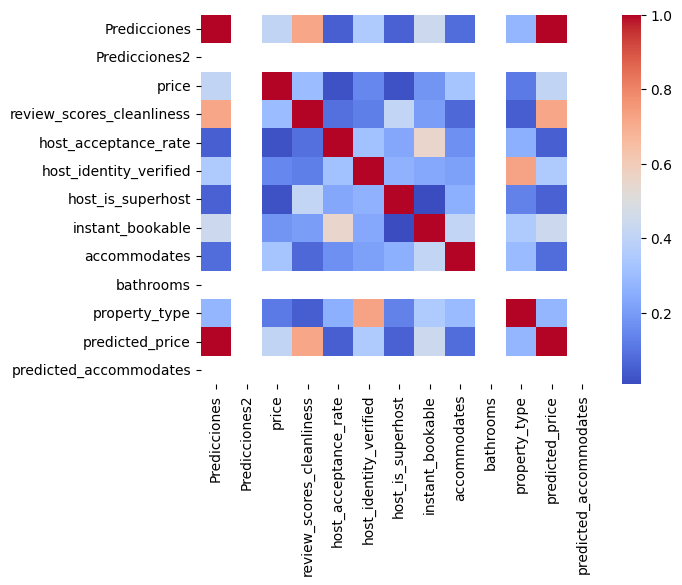

In [95]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'coolwarm')
Heart_Nap

<Axes: >

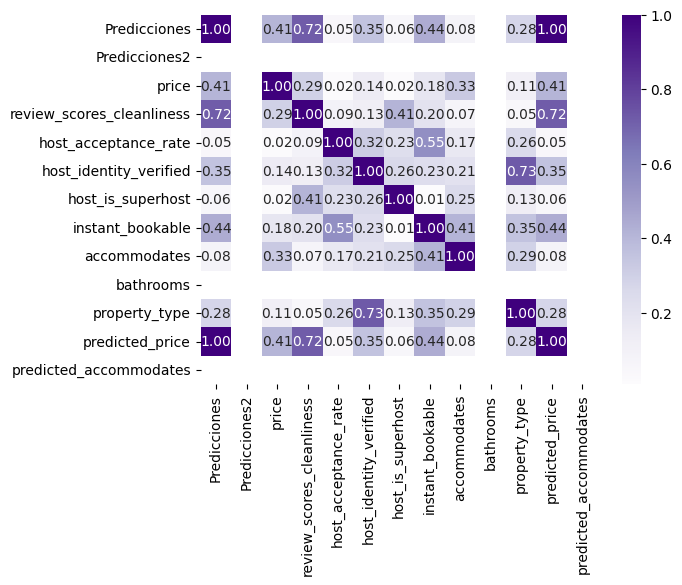

In [96]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap

In [97]:
Corr_Factors11 = df1.corr()
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.409450,0.720415,0.054046,0.353102,0.055609,-0.440989,0.082452,NaN,-0.276329,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.409450,NaN,1.000000,0.294974,0.022129,0.144578,0.022769,-0.180563,0.326902,NaN,-0.113143,0.409450,NaN
review_scores_cleanliness,0.720415,NaN,0.294974,1.000000,-0.092381,-0.125890,0.411379,-0.202183,0.072188,NaN,0.047669,0.720415,NaN
host_acceptance_rate,0.054046,NaN,0.022129,-0.092381,1.000000,0.316857,0.231731,0.552794,-0.167984,NaN,-0.259094,0.054046,NaN
host_identity_verified,0.353102,NaN,0.144578,-0.125890,0.316857,1.000000,0.260870,-0.233126,0.213156,NaN,-0.727833,0.353102,NaN
host_is_superhost,0.055609,NaN,0.022769,0.411379,0.231731,0.260870,1.000000,0.007771,0.253374,NaN,-0.132333,0.055609,NaN
instant_bookable,-0.440989,NaN,-0.180563,-0.202183,0.552794,-0.233126,0.007771,1.000000,-0.414039,NaN,0.354779,-0.440989,NaN
accommodates,0.082452,NaN,0.326902,0.072188,-0.167984,0.213156,0.253374,-0.414039,1.000000,NaN,-0.293785,0.082452,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
Corr_Factors11= abs(Corr_Factors9)
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,NaN,0.409450,0.720415,0.054046,0.353102,0.055609,0.440989,0.082452,NaN,0.276329,1.000000,NaN
Predicciones2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.409450,NaN,1.000000,0.294974,0.022129,0.144578,0.022769,0.180563,0.326902,NaN,0.113143,0.409450,NaN
review_scores_cleanliness,0.720415,NaN,0.294974,1.000000,0.092381,0.125890,0.411379,0.202183,0.072188,NaN,0.047669,0.720415,NaN
host_acceptance_rate,0.054046,NaN,0.022129,0.092381,1.000000,0.316857,0.231731,0.552794,0.167984,NaN,0.259094,0.054046,NaN
host_identity_verified,0.353102,NaN,0.144578,0.125890,0.316857,1.000000,0.260870,0.233126,0.213156,NaN,0.727833,0.353102,NaN
host_is_superhost,0.055609,NaN,0.022769,0.411379,0.231731,0.260870,1.000000,0.007771,0.253374,NaN,0.132333,0.055609,NaN
instant_bookable,0.440989,NaN,0.180563,0.202183,0.552794,0.233126,0.007771,1.000000,0.414039,NaN,0.354779,0.440989,NaN
accommodates,0.082452,NaN,0.326902,0.072188,0.167984,0.213156,0.253374,0.414039,1.000000,NaN,0.293785,0.082452,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


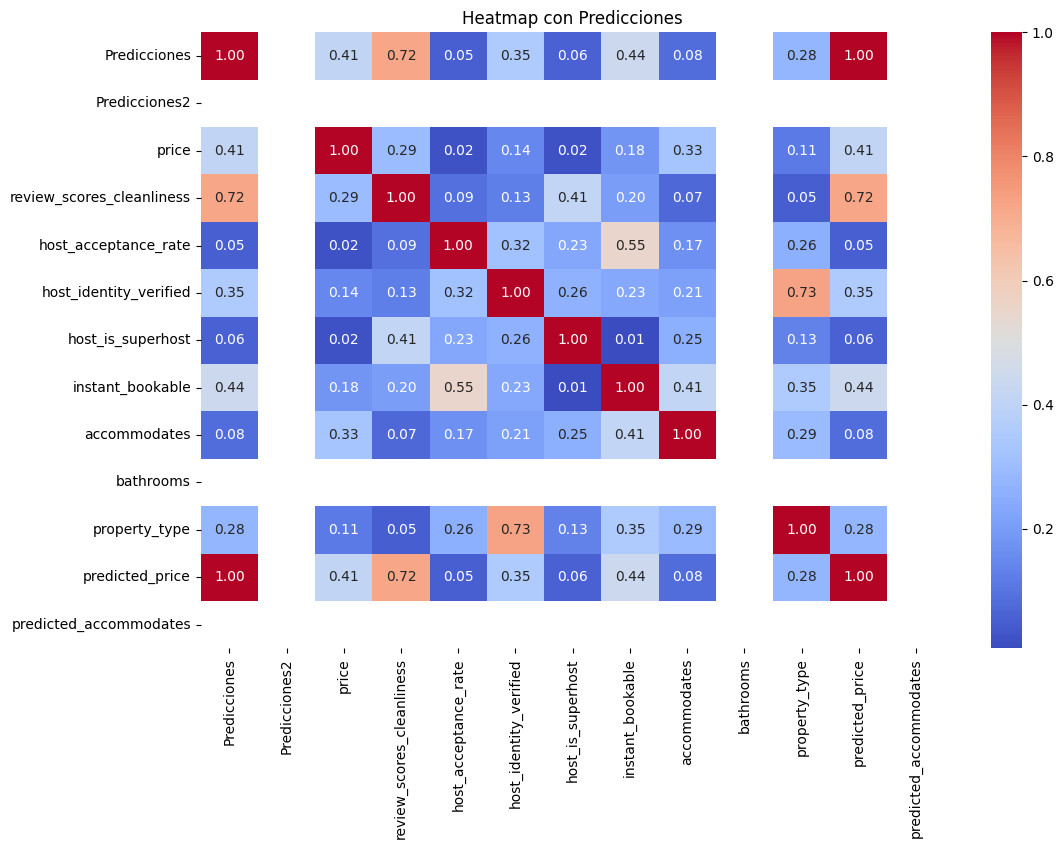

In [99]:
plt.figure(figsize=(12,8))
sns.heatmap(Corr_Factors11, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()